In [20]:
import numpy as np

file_path = 'digit_123.mat'
# 创建一个字典，用来存储我们从文件中解析出来的所有变量
parsed_data = {}

# 'with open' 会帮我们安全地打开和关闭文件
with open(file_path, 'r') as f:
    current_var_name = None
    current_var_data = []
    
    # 逐行读取文件
    for line in f:
        # 去掉行首行尾的空白字符
        line = line.strip()
        
        # 如果是注释行
        if line.startswith('#'):
            # 如果这行是变量名定义，说明一个新数据块开始了
            if line.startswith('# name:'):
                # 在开始新数据块之前，先把上一个数据块保存起来
                if current_var_name and current_var_data:
                    # 将收集到的字符串数据转换成numpy数组
                    array = np.array(current_var_data, dtype=float)
                    parsed_data[current_var_name] = array
                
                # 获取新的变量名，并清空数据列表，准备接收新数据
                current_var_name = line.split(':')[-1].strip()
                current_var_data = []
            # 其他注释行直接跳过
            continue
        
        # 如果是数据行，就把它按空格分割，然后加到当前变量的数据列表中
        if line: # 确保不是空行
            current_var_data.extend(line.split())

# 循环结束后，不要忘记保存最后一个读取的数据块
if current_var_name and current_var_data:
    array = np.array(current_var_data, dtype=float)
    parsed_data[current_var_name] = array

# --- 解析完成，我们来查看一下结果 ---
print("✅ File parsing successful!")
print("Found the following variables in the file:", list(parsed_data.keys()))
print("-" * 20)

# 打印出每个变量的形状 (shape)
for name, data in parsed_data.items():
    print(f"Shape of variable '{name}':")

# 现在，你可以像使用字典一样，通过变量名来访问数据了
# 例如，获取 'testx' 的数据
testx_data = parsed_data.get('testx')
if testx_data is not None:
    print(f"\nSuccessfully retrieved 'testx' data. First 5 values are:")
    print(testx_data[:5])

✅ File parsing successful!
Found the following variables in the file: ['ans', 'testx', 'testy', 'trainx', 'trainy']
--------------------
Shape of variable 'ans':
Shape of variable 'testx':
Shape of variable 'testy':
Shape of variable 'trainx':
Shape of variable 'trainy':

Successfully retrieved 'testx' data. First 5 values are:
[-0.99999988 -0.99999988 -0.99999988 -0.99998307 -0.99836063]


In [21]:
# --- 步骤 2: 将一维数据重塑为二维矩阵 ---

# 从我们解析好的字典里，先把所有数据拿出来
ans_data = parsed_data['ans']
test_x_1d = parsed_data['testx']
test_y_1d = parsed_data['testy']
train_x_1d = parsed_data['trainx']
train_y_1d = parsed_data['trainy']

# 根据样本数和特征数，定义矩阵的形状
num_test_samples = 30
num_train_samples = 30 
num_features = 256

# 使用 .reshape() 函数进行重塑
test_x = test_x_1d.reshape(num_test_samples, num_features)
train_x = train_x_1d.reshape(num_train_samples, num_features)

print("✅ Data reshaped successfully!")
print(f"Shape of 'test_x' after reshaping: {test_x.shape}")
print(f"Shape of 'train_x' after reshaping: {train_x.shape}")
print(f"Shape of test set labels 'test_y_1d': {test_y_1d.shape}")
print(f"Shape of training set labels 'train_y_1d': {train_y_1d.shape}")
# 现在，train_x 和 test_x 就是标准的机器学习输入格式了

✅ Data reshaped successfully!
Shape of 'test_x' after reshaping: (30, 256)
Shape of 'train_x' after reshaping: (30, 256)
Shape of test set labels 'test_y_1d': (30,)
Shape of training set labels 'train_y_1d': (30,)


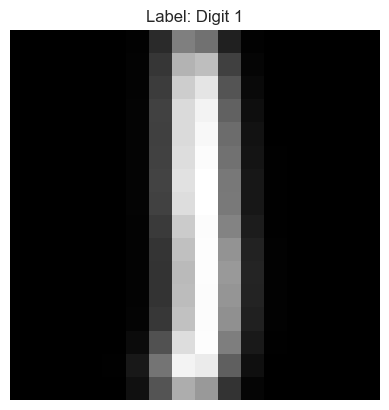

In [22]:
import matplotlib.pyplot as plt

# 让我们来查看训练集中的第一个样本
# train_x 的第一行就是第一个样本的数据
first_image_vector = train_x[0] 
# train_y_1d 的第一个元素就是它的标签
first_image_label = train_y_1d[0]

# 将 256 个元素的一维向量重塑为 16x16 的二维矩阵
image_matrix = first_image_vector.reshape(16, 16)

# 使用 matplotlib 的 imshow 函数来显示图像
# cmap='gray' 表示使用灰度色谱，数字大=白色，数字小=黑色
plt.imshow(image_matrix, cmap='gray')
plt.title(f"Label: Digit {int(first_image_label)}") # 将标签显示在标题中
plt.axis('off') # 不显示坐标轴
plt.show()

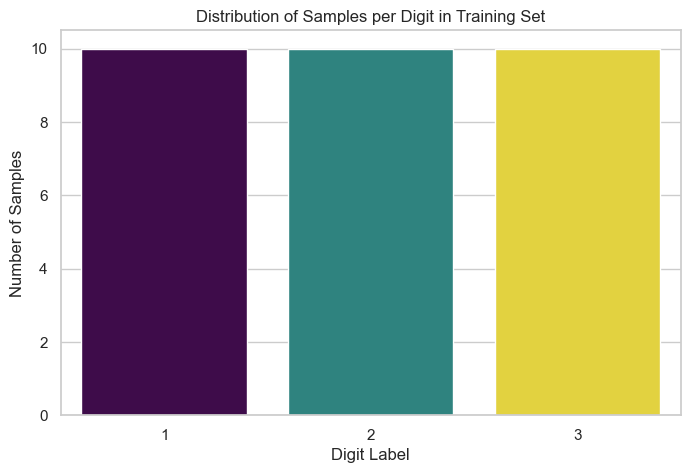

Sample count per digit:
{np.float64(1.0): np.int64(10), np.float64(2.0): np.int64(10), np.float64(3.0): np.int64(10)}


In [30]:
import seaborn as sns
import numpy as np

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 绘制条形图来显示每个标签的数量
plt.figure(figsize=(8, 5)) # 设置画布大小

data_to_plot = pd.DataFrame({'label': train_y_1d.astype(int)})
sns.countplot(data=data_to_plot, x='label', hue='label', palette="viridis", legend=False)

plt.title("Distribution of Samples per Digit in Training Set")
plt.xlabel("Digit Label")
plt.ylabel("Number of Samples")
plt.show()

# 也可以用 numpy 直接打印出具体的数字
unique, counts = np.unique(train_y_1d, return_counts=True)
print("Sample count per digit:")
print(dict(zip(unique, counts)))

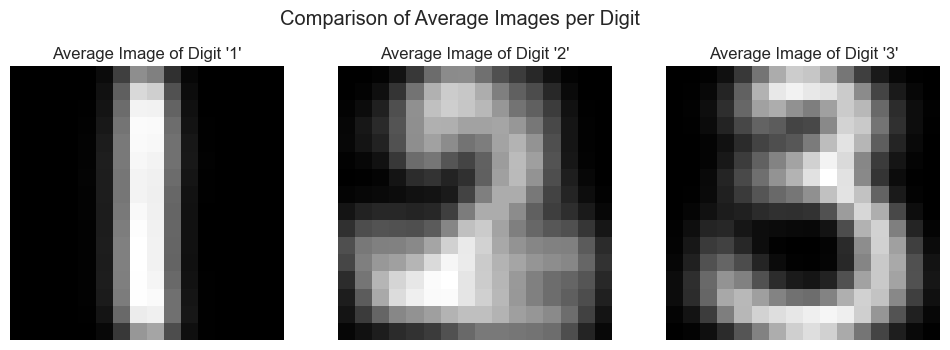

In [31]:
# 创建一个 1x3 的子图网格，用来并排显示3个数字的平均图像
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 我们要看的数字是 1, 2, 3
labels_to_show = [1, 2, 3]

for i, label in enumerate(labels_to_show):
    # 1. 找到所有标签为当前数字的图像
    #    train_y_1d == label 会返回一个布尔数组 [True, False, True, ...]
    #    train_x[...] 会根据这个布尔数组筛选出对应的行
    images_of_a_digit = train_x[train_y_1d == label]
    
    # 2. 计算这些图像的平均值
    #    axis=0 表示沿着行的方向（样本方向）进行平均
    mean_image = images_of_a_digit.mean(axis=0)
    
    # 3. 将平均后的一维向量重塑为 16x16 图像
    mean_image_matrix = mean_image.reshape(16, 16)
    
    # 4. 在对应的子图上显示图像
    ax = axes[i]
    ax.imshow(mean_image_matrix, cmap='gray')
    ax.set_title(f"Average Image of Digit '{label}'")
    ax.axis('off')

plt.suptitle("Comparison of Average Images per Digit")
plt.show()

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

print("✅ Feature scaling complete.")
print(f"Shape of train_x_scaled: {train_x_scaled.shape}")

✅ Feature scaling complete.
Shape of train_x_scaled: (30, 256)


✅ Model training complete!
✅ Prediction complete!

First 10 predictions by the model: [1 1 1 1 1 1 1 1 1 1]
First 10 true labels:            [1 1 1 1 1 1 1 1 1 1]
Accuracy: 1.0000
Macro Avg F1-Score: 1.0000
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


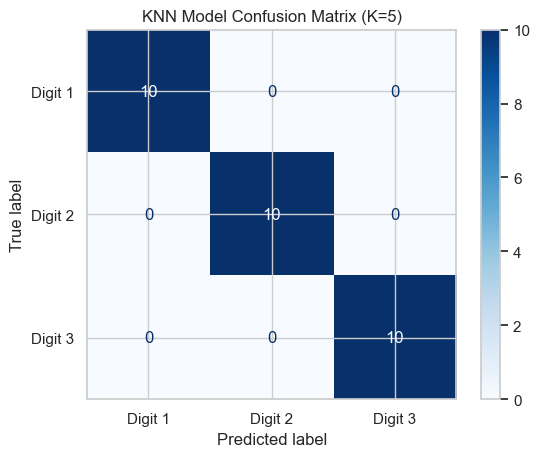

In [40]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")
# Predict
y_pred_knn = knn_model.predict(test_x)
print("✅ Prediction complete!")
print("\nFirst 10 predictions by the model:", y_pred_knn[:10].astype(int))
print("First 10 true labels:           ", test_y_1d[:10].astype(int))

# Evaluate
report_knn_dict = classification_report(test_y_1d, y_pred_knn, output_dict=True)
accuracy_knn = report_knn_dict['accuracy']
f1_knn = report_knn_dict['macro avg']['f1-score']

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Macro Avg F1-Score: {f1_knn:.4f}")
print(classification_report(test_y_1d, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    estimator=knn_model,
    X=test_x,
    y=test_y_1d,
    display_labels=['Digit 1', 'Digit 2', 'Digit 3'],
    cmap=plt.cm.Blues 
)
plt.title("KNN Model Confusion Matrix (K=5)")
plt.show()

In [37]:
import numpy as np
from collections import Counter

def knn_predict_from_scratch(train_x, train_y, test_x, k=5):
    """
    K-Nearest Neighbors classifier prediction function implemented from scratch.

    Args:
        train_x (np.ndarray): Training set features.
        train_y (np.ndarray): Training set labels.
        test_x (np.ndarray): Test set features.
        k (int): The number of nearest neighbors.

    Returns:
        np.ndarray: An array of predictions for the test set.
    """

    #  Euclidean distance: (a-b)^2 = a^2 - 2ab + b^2
    num_test = test_x.shape[0]
    num_train = train_x.shape[0]
    dists_sq = np.sum(train_x**2, axis=1)[:, np.newaxis] + np.sum(test_x**2, axis=1) - 2 * np.dot(train_x, test_x.T)
    
    # Find the nearest neighbors
    predictions = []
    for j in range(num_test):
        closest_y_indices = np.argsort(dists_sq[:, j])
        top_k_labels = train_y[closest_y_indices[:k]]

        vote_counts = Counter(top_k_labels)
        most_common_label = vote_counts.most_common(1)[0][0]
        predictions.append(most_common_label)

    return np.array(predictions)

# Evaluate
y_pred_scratch_knn = knn_predict_from_scratch(train_x, train_y_1d, test_x, k=5)

from sklearn.metrics import accuracy_score, classification_report

accuracy_scratch_knn = accuracy_score(test_y_1d, y_pred_scratch_knn)
report_scratch_knn_dict = classification_report(test_y_1d, y_pred_scratch_knn, output_dict=True)
f1_scratch_knn = report_scratch_knn_dict['macro avg']['f1-score']

print("\n--- 'From-Scratch' KNN Model Evaluation ---")
print(f"Accuracy: {accuracy_scratch_knn:.4f}")
print(f"Macro Avg F1-Score: {f1_scratch_knn:.4f}")
print("\nClassification Report:")
print(classification_report(test_y_1d, y_pred_scratch_knn))


--- 'From-Scratch' KNN Model Evaluation ---
Accuracy: 1.0000
Macro Avg F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



✅ Model training complete!
Making predictions on the test data...
✅ Predictions complete!
Accuracy: 0.6333
Macro Avg F1-Score: 0.6007
              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82        10
         2.0       0.48      1.00      0.65        10
         3.0       1.00      0.20      0.33        10

    accuracy                           0.63        30
   macro avg       0.83      0.63      0.60        30
weighted avg       0.83      0.63      0.60        30


Confusion Matrix:


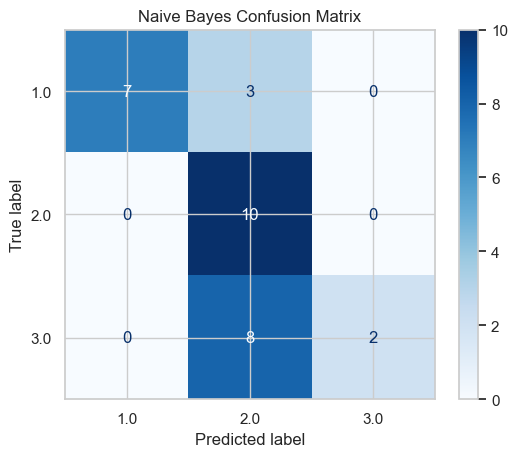

In [33]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
nb_model = GaussianNB()
# Train the model
nb_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")
# Predict
print("Making predictions on the test data...")
y_pred_nb = nb_model.predict(test_x)
print("✅ Predictions complete!")

# Evaluate
report_nb_dict = classification_report(test_y_1d, y_pred_nb, output_dict=True)
accuracy_nb = report_nb_dict['accuracy']
f1_nb = report_nb_dict['macro avg']['f1-score']

print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Macro Avg F1-Score: {f1_nb:.4f}")
print(classification_report(test_y_1d, y_pred_nb))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    nb_model,
    test_x,
    test_y_1d,
    cmap=plt.cm.Blues
)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Training the Logistic Regression model...
✅ Model training complete!
Making predictions on the test data...
✅ Predictions complete!
Accuracy: 1.0000
Macro Avg F1-Score: 1.0000
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


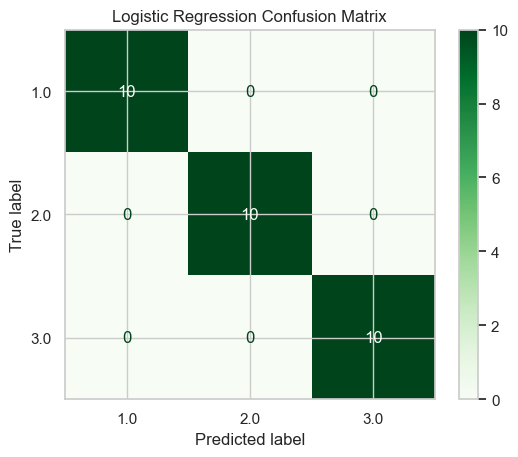

In [34]:
# Logistic Regression ModelS

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Train the Model
print("Training the Logistic Regression model...")
lr_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")


# Make Predictions
print("Making predictions on the test data...")
y_pred_lr = lr_model.predict(test_x)
print("✅ Predictions complete!")

# Evaluate
report_lr_dict = classification_report(test_y_1d, y_pred_lr, output_dict=True)
accuracy_lr = report_lr_dict['accuracy']
f1_lr = report_lr_dict['macro avg']['f1-score']

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Macro Avg F1-Score: {f1_lr:.4f}")
print(classification_report(test_y_1d, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    lr_model,
    test_x,
    test_y_1d,
    cmap=plt.cm.Greens # Let's use a different color map this time
)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

✅ Model training complete!
✅ Predictions complete!
Accuracy: 0.8667
Macro Avg F1-Score: 0.8611
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       0.71      1.00      0.83        10
         3.0       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30


Confusion Matrix:


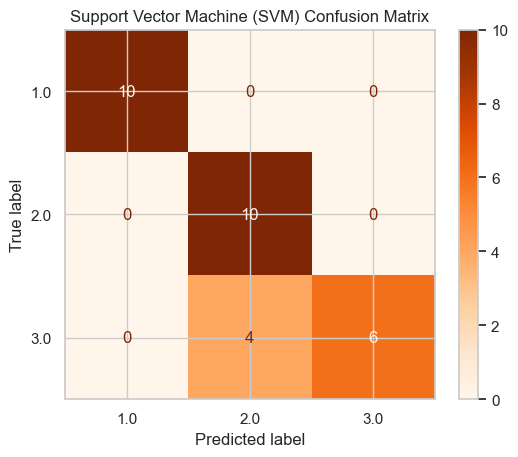

In [35]:
# SVM Model
from sklearn.svm import SVC # Import the Support Vector Classifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_model = SVC(kernel='linear', random_state=42)

# Train the Model
svm_model.fit(train_x_scaled, train_y_1d)
print("✅ Model training complete!")

# Make Predictions
y_pred_svm = svm_model.predict(test_x_scaled)
print("✅ Predictions complete!")

# Evaluate
report_svm_dict = classification_report(test_y_1d, y_pred_svm, output_dict=True)
accuracy_svm = report_svm_dict['accuracy']
f1_svm = report_svm_dict['macro avg']['f1-score']

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Macro Avg F1-Score: {f1_svm:.4f}")
print(classification_report(test_y_1d, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    svm_model,
    test_x_scaled, # Use scaled data for visualization as well
    test_y_1d,
    cmap=plt.cm.Oranges # Let's use another color map
)
plt.title("Support Vector Machine (SVM) Confusion Matrix")
plt.show()

In [36]:
import pandas as pd

model_performance_data = {
    'Model': [
        'K-Nearest Neighbors (KNN)', 
        'Naive Bayes', 
        'Logistic Regression', 
        'Linear SVM'
    ],
    'Accuracy': [
        accuracy_knn, 
        accuracy_nb, 
        accuracy_lr, 
        accuracy_svm
    ],
    'Macro Avg F1-Score': [
        f1_knn,
        f1_nb,
        f1_lr,
        f1_svm
    ]
}

performance_df = pd.DataFrame(model_performance_data)
performance_df_sorted = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("--- Model Performance Comparison (Auto-generated) ---")
print(performance_df_sorted)

--- Model Performance Comparison (Auto-generated) ---
                       Model  Accuracy  Macro Avg F1-Score
0  K-Nearest Neighbors (KNN)  1.000000            1.000000
1        Logistic Regression  1.000000            1.000000
2                 Linear SVM  0.866667            0.861111
3                Naive Bayes  0.633333            0.600675
